In [120]:
import datetime
import time
import numpy as np
import networkx as nx
import random
from collections import defaultdict
from dateutil.relativedelta import *
from networkx.drawing.nx_agraph import graphviz_layout
from scipy import optimize
import graph
reload(graph)

from graph import IPv6Graph
from scipy.misc import derivative
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
from importlib import reload

# reload(plt)
matplotlib.use('svg')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'
matplotlib.rcParams["mathtext.fontset"] = "cm"
matplotlib.rcParams.update({'font.size': 8})
from statsmodels.distributions.empirical_distribution import ECDF
# matplotlib.font_manager._rebuild()
from networkx.readwrite import json_graph
import json

In [86]:
from collections import defaultdict
x = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

x['0'][1]['adopted'] += 1

In [90]:
def plot_histogram(l, fname, title, bins):
    fig, axs = plt.subplots(1, 1, figsize=(3.25, 2.25))
    plt.hist(l, bins=bins)
    plt.title(title)
    plt.tight_layout()
    plt.savefig(fname, bbox_inches='tight')
    plt.show()

def plot_cdf(l, fname, title, xlabel):
    fig, axs = plt.subplots(1, 1, figsize=(3.25, 2.25))
    ecdf = ECDF(l)
    plt.plot(ecdf.x, ecdf.y)
    plt.xlabel(xlabel)
    plt.ylabel('Probability')
    plt.title(title)
    plt.tight_layout()
    plt.savefig(fname, bbox_inches='tight')
    plt.show()

def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

In [91]:
start_date = datetime.date(year=2008, month=12, day=1)
end_date = datetime.date(year=2020, month=4, day=1)
ipv6_graph = IPv6Graph(start_date, end_date)
ipv6_nodes_monthly = ipv6_graph.build_graph()

12/2008
# IPv6 nodes:  411
01/2009
# IPv6 nodes:  453
02/2009
# IPv6 nodes:  474
03/2009
# IPv6 nodes:  496
04/2009
# IPv6 nodes:  509
05/2009
# IPv6 nodes:  523
06/2009
# IPv6 nodes:  545
07/2009
# IPv6 nodes:  549
08/2009
# IPv6 nodes:  575
09/2009
# IPv6 nodes:  582
10/2009
# IPv6 nodes:  594
11/2009
# IPv6 nodes:  729
12/2009
# IPv6 nodes:  746
01/2010
# IPv6 nodes:  760
02/2010
# IPv6 nodes:  770
03/2010
# IPv6 nodes:  782
04/2010
# IPv6 nodes:  789
05/2010
# IPv6 nodes:  805
06/2010
# IPv6 nodes:  817
07/2010
# IPv6 nodes:  842
08/2010
# IPv6 nodes:  1005
09/2010
# IPv6 nodes:  1058
10/2010
# IPv6 nodes:  1111
11/2010
# IPv6 nodes:  1145
12/2010
# IPv6 nodes:  1169
01/2011
# IPv6 nodes:  1294
02/2011
# IPv6 nodes:  1341
03/2011
# IPv6 nodes:  1388
04/2011
# IPv6 nodes:  1422
05/2011
# IPv6 nodes:  1702
06/2011
# IPv6 nodes:  1771
07/2011
# IPv6 nodes:  1819
08/2011
# IPv6 nodes:  1855
09/2011
# IPv6 nodes:  1883
10/2011
# IPv6 nodes:  1934
11/2011
# IPv6 nodes:  2214
12/2011
# IP

In [121]:
ipv6_json = json.dumps(ipv6_graph.G)
ipv6_json

TypeError: Object of type 'Graph' is not JSON serializable

In [101]:
ipv6_graph.adoption_dict.keys()

dict_keys([1228107600, 1230786000, 1233464400, 1235883600, 1238558400, 1241150400, 1243828800, 1246420800, 1249099200, 1251777600, 1254369600, 1257048000, 1259643600, 1262322000, 1265000400, 1267419600, 1270094400, 1272686400, 1275364800, 1277956800, 1280635200, 1283313600, 1285905600, 1288584000, 1291179600, 1293858000, 1296536400, 1298955600, 1301630400, 1304222400, 1306900800, 1309492800, 1312171200, 1314849600, 1317441600, 1320120000, 1322715600, 1325394000, 1328072400, 1330578000, 1333252800, 1335844800, 1338523200, 1341115200, 1343793600, 1346472000, 1349064000, 1351742400, 1354338000, 1357016400, 1359694800, 1362114000, 1364788800, 1367380800, 1370059200, 1372651200, 1375329600, 1378008000, 1380600000, 1383278400, 1385874000, 1388552400, 1391230800, 1393650000, 1396324800, 1398916800, 1401595200, 1404187200, 1406865600, 1409544000, 1412136000, 1414814400, 1417410000, 1420088400, 1422766800, 1425186000, 1427860800, 1430452800, 1433131200, 1435723200, 1438401600, 1441080000, 14436

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 93, 94, 95, 98, 101, 106, 110, 111, 112, 113, 114, 115, 116, 119, 121, 122, 128, 132, 136, 148, 161, 200, 207, 210, 213, 215, 216, 223, 235, 241, 246, 255, 268, 382, 527]
[0.0001372495196266813, 0.0001410238330277817, 0.000431667098333765, 0.0008361204013377926, 0.0010075566750629723, 0.0011627906976744186, 0.0034965034965034965, 0.0, 0.0, 0.0036900369003690036, 0.0, 0.004291845493562232, 0.0, 0.006993006993006993, 0.0, 0.0, 0.0, 0.0136986301369863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.058823529411764705, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1111111111111111, 0.0, 0.0, 0.0, 0.0625, 0.0, 0.0, 0.0, 0.1538461

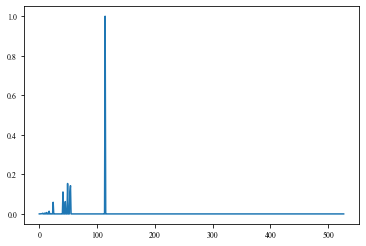

In [112]:
d = ipv6_graph.adoption_dict[1335844800]
xy = []
for k, v in d.items():
    na = v['not_adopted']
    a = v['adopted']
    xy.append((k, a / float(a + na)))
xy = sorted(xy)
x = [xy_[0] for xy_ in xy]
y = [xy_[1] for xy_ in xy]
print(x)
print(y)
plt.plot(x,y)

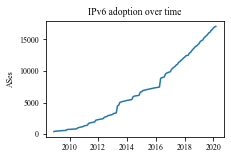

In [92]:
x = []
y = []
for k, v in ipv6_nodes_monthly.items():
    x.append(k)
    y.append(v)
fig, axs = plt.subplots(1, 1, figsize=(3.25, 2.25))
plt.plot(x, y)
plt.title('IPv6 adoption over time')
plt.ylabel('ASes')
plt.tight_layout()
plt.savefig('figures/ipv6_adoption_over_time.pdf', bbox_inches='tight')
plt.show()

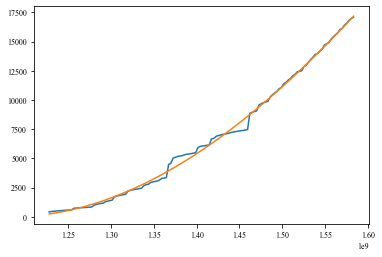

In [93]:
x_posix = [int(time.mktime(d.timetuple())) for d in x]
z = np.polyfit(x_posix, y, 3)
f = np.poly1d(z)
y_new = f(x_posix)

plt.plot(x_posix, y, x_posix, y_new)

In [94]:
G_ = ipv6_graph.G

months_between_adoption = []
for node in ipv6_graph.ipv6_nodes:
    n = G_.nodes[node]
    time_adopted = n.get('time_adopted')
    num_neighbors = n.get('num_neighbors')
    ipv6_neighbors = n.get('ipv6_neighbors')
    if len(ipv6_neighbors) > 0:
        neighbor_last_adopted = n.get('neighbor_last_adopted')
        months = diff_month(time_adopted, neighbor_last_adopted)
        months_between_adoption.append(months)

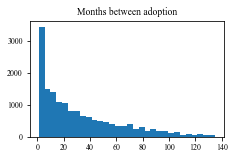

In [95]:
plot_histogram(months_between_adoption, 'figures/months_between_adoption.pdf', 'Months between adoption', bins=30)

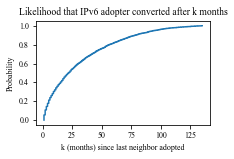

In [96]:
plot_cdf(months_between_adoption, 'figures/months_between_adoption.pdf', 'Likelihood that IPv6 adopter converted after k months', 'k (months) since last neighbor adopted')

In [97]:
frac_ipv6_neighbors = []
for node in ipv6_graph.ipv6_nodes:
    n = G_.nodes[node]
    num_ipv6_neighbors = len(n.get('ipv6_neighbors'))
    num_neighbors = n.get('num_neighbors')
    frac_ipv6_neighbors.append(num_ipv6_neighbors / float(num_neighbors) * 100.)

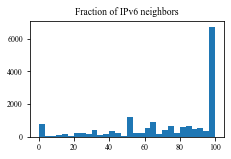

In [98]:
plot_histogram(frac_ipv6_neighbors, 'figures/frac_ipv6_neighbors.pdf', 'Fraction of IPv6 neighbors', bins=30)

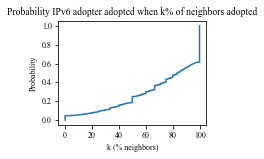

In [99]:
plot_cdf(frac_ipv6_neighbors, 'figures/frac_ipv6_neighbors.pdf', 'Probability IPv6 adopter adopted when k% of neighbors adopted', 'k (% neighbors)')

In [100]:
adopted = {}
not_adopted = {}
t1 = 
for node in ipv6_graph.nodes:
    n = G_.nodes[node]
    if n.get('ipv6'):
        time_adopted = n.get('time_adopted')
        ipv6_neighbors = n.get('ipv6_neighbors')
        num_ipv6_neighbors = len(ipv6_neighbors)
        neighbor_last_adopted = n.get('neighbor_last_adopted')
        months = diff_month(time_adopted, neighbor_last_adopted)
        if months == 1:
            adopted[num_ipv6_neighbors] += 1
    else:
        neighbors = G_.neighbors(node)
        
        ipv6_neighbor_times_adopted = [self.G.nodes[x].get('time_adopted') for x in ipv6_neighbors]

SyntaxError: invalid syntax (<ipython-input-100-b489fc773f2a>, line 3)

In [ ]:
frac_ipv6_neighbors_1mo = []
for node in ipv6_graph.ipv6_nodes:
    n = G_.nodes[node]
    time_adopted = n.get('time_adopted')
    ipv6_neighbors = n.get('ipv6_neighbors')
    num_ipv6_neighbors = len(ipv6_neighbors)
    num_neighbors = n.get('num_neighbors')
    if num_ipv6_neighbors > 0:
        neighbor_last_adopted = n.get('neighbor_last_adopted')
        months = diff_month(time_adopted, neighbor_last_adopted)
        if months == 1:
            frac_ipv6_neighbors_1mo.append(num_ipv6_neighbors / float(num_neighbors))

In [ ]:
plot_histogram(frac_ipv6_neighbors_1mo, 'figures/frac_ipv6_neighbors_1mo.pdf', 'Fraction of IPv6 neighbors', bins=30)

In [ ]:
plot_cdf(frac_ipv6_neighbors_1mo, 'figures/frac_ipv6_neighbors_1mo.pdf', 'Fraction of IPv6 neighbors')

In [ ]:
cascade_sizes = []
cascade_depths = []
cascade_size_dict = {}
cascade_depth_dict = {}
cascade_size_small = []
initial_nodes = filter(lambda x: len(G_.nodes[x].get('ipv6_neighbors', [0])) == 0, G_.nodes)
# print(len(list(initial_nodes)))
for node in initial_nodes:
    print(node)
    cascade_size = ipv6_graph.calculate_cascade_size(node, set())
    cascade_depth = ipv6_graph.calculate_cascade_depth(node, 0, set())
    cascade_depths.append(cascade_depth)
    cascade_sizes.append(cascade_size)
    if cascade_size < 50 and cascade_depth > 3:
        cascade_size_small.append(node)
    cascade_size_dict[cascade_size] = node
    cascade_depth_dict[cascade_depth] = node

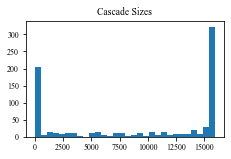

In [20]:
plot_histogram(cascade_sizes, 'figures/cascade_sizes.pdf', 'Cascade Sizes', 30) 

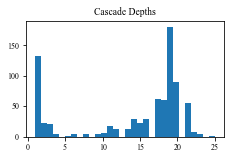

In [21]:
plot_histogram(cascade_depths, 'figures/cascade_depths.pdf', 'Cascade Depths', 30) 

In [113]:
def build_graph(node, seen_nodes, c_G, G):
    time_adopted = G.nodes[node]['time_adopted']
    for neighbor in G.neighbors(node):
        if G.nodes[neighbor].get('ipv6') and G.nodes[neighbor]['time_adopted'] > time_adopted:
            c_G.add_edge(node, neighbor)
            if neighbor not in seen_nodes:
                seen_nodes.add(neighbor)
                c_G = build_graph(neighbor, seen_nodes, c_G, G)
    return c_G

def draw_graph(root_node, G):
    c_G = build_graph(root_node, set(), nx.DiGraph(), G)
    time_adopted_set = set([G.nodes[root_node]['time_adopted']])
    for node in c_G.nodes:
        time_adopted_set.add(G.nodes[node]['time_adopted'])
    time_adopted_list = sorted(list(time_adopted_set))
    node_colors = range(len(time_adopted_list))
    node_color_list = []
    labels = {}
    for node in c_G.nodes:
        labels[node] = time_adopted_list.index(G.nodes[node]['time_adopted'])
        node_color_list.append(node_colors[time_adopted_list.index(G.nodes[node]['time_adopted'])])
    pos=graphviz_layout(c_G, prog='dot')

    nx.draw(c_G, pos=pos, node_color=node_color_list, edge_colors='black', cmap=plt.cm.Blues, node_size=25, arrow_size=1, width=0.5)

def draw_graphs(root_nodes, fname, G):  
    print(root_nodes)
    plt.subplot(231)
    draw_graph(root_nodes[0], G)
    
    plt.subplot(232)
    draw_graph(root_nodes[1], G)
    
    plt.subplot(233)
    draw_graph(root_nodes[2], G)
    
    plt.subplot(234)
    draw_graph(root_nodes[3], G)
    
    plt.subplot(235)
    draw_graph(root_nodes[4], G)
    
    plt.subplot(236)
    draw_graph(root_nodes[5], G)


    plt.tight_layout()
    plt.savefig(fname, bbox_inches='tight')
    plt.show()

[206884, 135125, 59494, 135610, 55466, 133149]


ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')

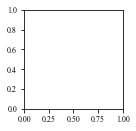

In [114]:
draw_graphs([206884, 135125, 59494, 135610, 55466, 133149], 'figures/cascade_examples.pdf', G_)

In [60]:
cascade_size_small

[34766,
 51282,
 131447,
 131322,
 59494,
 52390,
 59370,
 55466,
 133149,
 135610,
 135125,
 264773,
 206488,
 206884]